Accuracy: 0.72
Average Precision Score: 0.6054545454545455
Kappa: 0.42622950819672123
Hamming Loss: 0.28
AUC: 0.7987012987012988
Sensitivity0.6363636363636364
Specificity0.7857142857142857
0.7697348763359573
Accuracy: 0.74
Average Precision Score: 0.6288995215311004
Kappa: 0.46457990115321257
Hamming Loss: 0.26
AUC: 0.7727272727272727
Sensitivity0.6363636363636364
Specificity0.8214285714285714


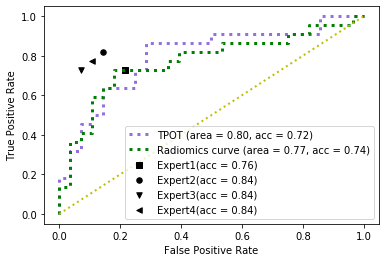

In [5]:
# %load features100.py
import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score,auc, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

import csv
import pandas as pd
import numpy as np
from sklearn import model_selection
from tpot import TPOTClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
#from pyearth import Earth
from sklearn.cross_decomposition import PLSRegression


from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from skfeature.function.statistical_based import t_score
from skfeature.function.statistical_based import gini_index
from skfeature.function.similarity_based import fisher_score
from skfeature.function.similarity_based import reliefF

from sklearn.feature_selection import mutual_info_classif
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MIM
from skfeature.function.information_theoretical_based import MIFS
from skfeature.function.information_theoretical_based import MRMR
from skfeature.function.information_theoretical_based import CIFE
from skfeature.function.information_theoretical_based import JMI
from skfeature.function.information_theoretical_based import CMIM
from skfeature.function.information_theoretical_based import ICAP
from skfeature.function.information_theoretical_based import DISR

from scipy.stats import wilcoxon

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings


file_train = open("./csv/train.csv")
csv_f = csv.reader(file_train)
features = next(csv_f)
dataset = pd.read_csv("./csv/train.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["outcome"] = pd.to_numeric(dataset["outcome"], errors='coerce')
dataset.dropna(axis=1, thresh=2, inplace=True)
dataset.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(dataset)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

file_validate = open("./csv/validation.csv")
csv_f = csv.reader(file_validate)
features = next(csv_f)
dataset = pd.read_csv("./csv/validation.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["outcome"] = pd.to_numeric(dataset["outcome"], errors='coerce')
dataset.dropna(axis=1, thresh=2, inplace=True)
validate_feature = np.array(dataset)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0


file_test = open("./csv/test.csv")
csv_f = csv.reader(file_test)
features = next(csv_f)
dataset = pd.read_csv("./csv/test.csv", names=features, usecols=range(1,6132), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["outcome"] = pd.to_numeric(dataset["outcome"], errors='coerce')
dataset.dropna(axis=1, thresh=2, inplace=True)
test_feature = np.array(dataset)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0


#only use image features
X_train = train_feature[:,:6130]
Y_train = train_feature[:,6130]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6130]
Y_validate = validate_feature[:,6130]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6130]
Y_test = test_feature[:,6130]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)


pipe = joblib.load('pkl/tpot_uterus_1.pkl')


        
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
fpr, tpr, thresholds= precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = auc(tpr,fpr)
print(auc)

from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.roc_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='TPOT (area = {0:0.2f}, acc = 0.72)'
         ''.format(auc),
         color='mediumpurple', linestyle=':', linewidth=3)


pipe = joblib.load('handpkl/NNetFSCR100.pkl')
        
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))



#plot for hand optimization
fpr, tpr, thresholds= metrics.roc_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.74)'
               ''.format(auc),
         color='green', linestyle=':', linewidth=3)
plt.plot([0,1],[0,1],color='y',linestyle=':',linewidth=2)



import numpy as np
file = open('./csv/experts_outcome.csv','r')
expert = []
for index,row in enumerate(csv.reader(file)):
    if index == 0:
        continue
    tmp = [int(row[1]),int(row[2]),int(row[3]),int(row[4]),int(row[5])]
    expert.append(tmp)
expert = np.array(expert)
Y_test = expert[:,4]
expert1 = expert[:,0]
expert2 = expert[:,1]
expert3 = expert[:,2]
expert4 = expert[:,3]

#plot for expert1
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert1, pos_label=1)
acc_1 = accuracy_score(Y_test, expert1)
plt.scatter(fpr[1],tpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert2, pos_label=1)
acc_2 = accuracy_score(Y_test, expert2)
plt.scatter(fpr[1], tpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert3
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert3, pos_label=1)
acc_3 = accuracy_score(Y_test, expert3)
plt.scatter(fpr[1], tpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert4
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert4, pos_label=1)
acc_4 = accuracy_score(Y_test, expert4)
plt.scatter(fpr[1], tpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)





plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc.tif',dpi=300)
plt.show()

Accuracy: 0.72
Average Precision Score: 0.6054545454545455
Kappa: 0.42622950819672123
Hamming Loss: 0.28
AUC: 0.7987012987012988
Sensitivity0.6363636363636364
Specificity0.7857142857142857
Accuracy: 0.74
Average Precision Score: 0.6288995215311004
Kappa: 0.46457990115321257
Hamming Loss: 0.26
AUC: 0.7727272727272727
Sensitivity0.6363636363636364
Specificity0.8214285714285714


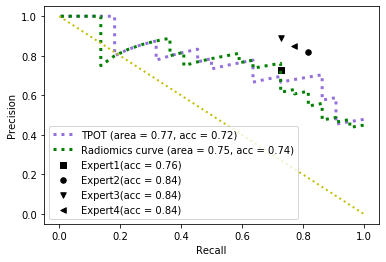

In [7]:
pipe = joblib.load('pkl/tpot_uterus_1.pkl')


        
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))


from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
plt.plot(tpr, fpr,
         label='TPOT (area = {0:0.2f}, acc = 0.72)'
         ''.format(auc),
         color='mediumpurple', linestyle=':', linewidth=3)



pipe = joblib.load('handpkl/NNetFSCR100.pkl')
        
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_prob[:,1])))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))


#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, Y_prob[:,1], pos_label=1)
auc = metrics.auc(tpr,fpr)
plt.plot(tpr, fpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.74)'
         ''.format(auc),
         color='green', linestyle=':', linewidth=3)



fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert1, pos_label=1)
acc_1 = accuracy_score(Y_test, expert1)
plt.scatter(tpr[1],fpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert2, pos_label=1)
acc_1 = accuracy_score(Y_test, expert2)
plt.scatter(tpr[1],fpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert3, pos_label=1)
acc_1 = accuracy_score(Y_test, expert3)
plt.scatter(tpr[1],fpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

fpr, tpr, thresholds= metrics.precision_recall_curve(Y_test, expert4, pos_label=1)
acc_1 = accuracy_score(Y_test, expert4)
plt.scatter(tpr[1],fpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

plt.plot([0,1],[1,0],color='y',linestyle=':',linewidth=2)

plt.legend(loc = 'lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.savefig('prroc.tif',dpi=300)
plt.show()